# Euclide

Traduction en assembleur de l'algorithme d'Euclide.

## Version initiale

Dans l'une des premières traductions en français des éléments d'Euclides :

![ElementsEuclide](ElementsEuclide.png)

## Programme moderne

Version moderne :

```
Saisie A, B
Tant que A<> B
  si A > B alors
    A <- B
  sinon
    B <- A
  fsi
ftq
Affichage A, B
```

## Organisation du code

L'objectif n'est pas de traduire d'un seul morceau l'algorithme, mais, à la manière des compilateurs, traduire morceau par morceau l'algorithme. Pour cela, analysons la structure syntaxique du programme.

### Analyse de la construction syntaxique du programme

![euclideSyntaxique](euclideSyntaxique.png)

Hors les textes (à traduire en assembleur), l'algorithme se découpe en 7 éléments de codes auxquels nous associerons 7 morceaux (ou extraits) de code, un fichier par extrait. L'assemblage des fichiers par inclusion (```#include 'file' ```) permettra de retrouver le code complet.

### Shéma de l'organisation en fichier

<table style="border-style:solid;" >
  <tr><td>fichier:Euclide</td></tr> 
  <tr><td><table >
      <tr><td>déclarations A, B;</td></tr>
      <tr><td  style="border-style:solid;margin:10px;display:block;">&nbsp;&nbsp;extrait:Saisie A, B</td></tr>
      <tr><td  style="border-style:solid;margin:10px;display:block;"><table >
           <tr><td>&nbsp;&nbsp;extrait:Boucle</td></tr>
           <tr><td>&nbsp;&nbsp;Tant que A<>B faire:</td></tr>
           <tr><td style="border-style:solid;margin:10px;display:block;"><table>
               <tr><td>&nbsp;&nbsp;&nbsp;&nbsp;extrait:Corps Boucle</td></tr>
               <tr><td>&nbsp;&nbsp;&nbsp;&nbsp;Si A&gt;B alors</td></tr>
               <tr><td style="border-style:solid;margin:10px;display:block;">&nbsp;&nbsp;&nbsp;&nbsp;extrait:Alors (A<-A-B)</td></tr>
               <tr><td>&nbsp;&nbsp;&nbsp;&nbsp;Sinon</td></tr>
               <tr><td style="border-style:solid;margin:10px;display:block;">&nbsp;&nbsp;&nbsp;&nbsp;extrait:Sinon (B<-B-A)</td></tr>
               <tr><td>&nbsp;&nbsp;&nbsp;&nbsp;fsi</td></tr></table></td></tr>
           <tr><td>&nbsp;&nbsp;ftq</td></tr></table></td></tr>
  <tr><td  style="border-style:solid;margin:10px;display:block;">&nbsp;&nbsp;extrait:Affichage A, B</td></tr></table></td></tr>
</table>

### Mise en place

Les 7 fichiers, avec les inclusions, seront donc :

In [1]:
%%writefile euclide.es
@declarations A, B;
#include "saisie.es"
#include "boucle.es"
#include "affichage.es"

Overwriting euclide.es


In [2]:
%%writefile saisie.es
@saisir A
@saisir B

Overwriting saisie.es


In [3]:
%%writefile boucle.es
@tant que A<>B faire
#include "corpsBoucle.es"
@ftq

Overwriting boucle.es


In [4]:
%%writefile corpsBoucle.es
@Si A>B faire
#include "alors.es"
@sinon
#include "sinon.es"
@fsi

Overwriting corpsBoucle.es


In [5]:
%%writefile alors.es
@A<-A-B

Overwriting alors.es


In [6]:
%%writefile sinon.es
@B<-B-A

Overwriting sinon.es


In [7]:
%%writefile affichage.es
@afficher A
@afficher B

Overwriting affichage.es


## Contrôle de la structure

Pour vérifier l'organisation :

In [8]:
!cpp -P euclide.es

@declarations A, B;
@saisir A
@saisir B
@tant que A<>B faire
@Si A>B faire
@A<-A-B
@sinon
@B<-B-A
@fsi
@ftq
@afficher A
@afficher B


C'est ok.

rem. 1 : l'indentation est plate (cf. les fichiers originaux), c'est normal. L'objectif étant un code assembleur, il n'y aura pas d'indentation supplémentaire.

rem. 2 : pour ajouter une trace optionnel, on peut ajouter dans la fin du corps de la boucle initiale un affichage optionnel en utilisant le code (à fournir pour l'algorithme initial) de l'affichage final (i.e. : cela ne demande pas de programmation supplémentaire) :

In [9]:
%%writefile corpsBoucle.es
@Si A>B faire
#include "alors.es"
@sinon
#include "sinon.es"
@fsi
#ifdef TRACEBOUCLE
#include "affichage.es"
#endif

Overwriting corpsBoucle.es


Il sera activé par :

In [10]:
!cpp -P -D TRACEBOUCLE euclide.es

@declarations A, B;
@saisir A
@saisir B
@tant que A<>B faire
@Si A>B faire
@A<-A-B
@sinon
@B<-B-A
@fsi
@afficher A
@afficher B
@ftq
@afficher A
@afficher B


Par défaut, ```cpp``` n'ajoutera pas cet affichage.

rem. 3 : pour tester chaque partie de code, on peut réutiliser la structure du programme initial (```Saisie Calcul Affichage```) en remplaçant le calcul par la partie de code à tester :

In [11]:
%%writefile euclide.es
@declarations A, B;
#ifndef FICHIERCENTRAL
#define FICHIERCENTRAL "boucle.es"
#endif
#include "saisie.es"
#include FICHIERCENTRAL
#include "affichage.es"

Overwriting euclide.es


Par défaut, ```cpp``` continue à produire le fichier complet, avec une option, il permet de produire le fichier de test d'un extrait de code, par ex: le corps de boucle :

In [12]:
!cpp -P -D FICHIERCENTRAL="\"corpsBoucle.es\"" euclide.es

@declarations A, B;
@saisir A
@saisir B
@Si A>B faire
@A<-A-B
@sinon
@B<-B-A
@fsi
@afficher A
@afficher B


# Programmation

## Fichier global

(à faire en premier)

Il s'agit de traduire les déclarations et de prévoir le schéma global du programme.

### Traduction

Contrairement à mes habitudes, je place les relais en début de zone ```.text``` pour être proche des déclarations de la zone ```.data```. L'étiquette ```main``` se situe donc un peu plus loin (et non pas en début de section).

In [13]:
%%writefile euclide.es
#ifndef FICHIERCENTRAL
#define FICHIERCENTRAL "boucle.es"
#endif
@declarations A, B;
.data
A: .word 0
B: .word 0
.text
.global main
LD_A: .word A
LD_B: .word B
main:
  push {lr}
#include "saisie.es"
#include FICHIERCENTRAL
#include "affichage.es"
  mov R0,#0
  pop {lr}
  bx lr

Overwriting euclide.es


### Vérification du fichier global

Je peux tester, la compilation et l'exécution, mais le programme est (presque) vide, il n'y aura pas d'affichage :

In [14]:
!cpp -P euclide.es > euclide.s
!arm-linux-gnueabi-gcc -static -c euclide.s
!arm-linux-gnueabi-gcc -static -c es.s
!arm-linux-gnueabi-gcc -static euclide.o es.o -o euclide
!echo "42 2048" | qemu-arm euclide
!echo "fin"

fin


Pour avoir un affichage, il faut par exemple introduire une erreur.

Par exemple :

* un erreur lors des inclusions

In [15]:
!cpp -P euclide.es -D FICHIERCENTRAL="rien.s" > euclide.s
!arm-linux-gnueabi-gcc -static -c euclide.s
!arm-linux-gnueabi-gcc -static -c es.s
!arm-linux-gnueabi-gcc -static euclide.o es.o -o euclide
!echo "42 2048" | qemu-arm euclide
!echo "fin"

euclide.es:15:10: error: #include expects "FILENAME" or <FILENAME>
   15 | #include FICHIERCENTRAL
      |          ^~~~~~~~~~~~~~
fin


On peut faire d'autres erreurs pour vérifier les autres parties du processus de compilation/exécution :

* Changer l'instruction ```push``` en une instruction qui n'existe pas pour que la compilation (séparée) échoue
* Changer le relai ```LD_A : . word A``` vers une adresse qui n'existe pas pour que l'édition de lien échoue
* Changer le ```bx lr``` pour que le programme boucle à l'infini lors de l'exécution et ne rende pas la main
* etc.

## Entrées/sorties

Pour avoir un début de programme testable, il faut saisir/afficher.

### Traduction

En utilisant la bibliothèque es.s, la traduction de la saisie et de l'affichage sont :

In [16]:
%%writefile saisie.es
@saisir A
  ldr R1, LD_A
  bl Lire32
@saisir B
  ldr R1, LD_B
  bl Lire32

Overwriting saisie.es


In [17]:
%%writefile affichage.es
@afficher A
  ldr R0, LD_A
  ldr R1, [R0]
  bl EcrZdecimal32
@afficher B
  ldr R0, LD_B
  ldr R1, [R0]
  bl EcrZdecimal32

Overwriting affichage.es


### Test des entrées sorties

On peut tester :

In [18]:
!cpp -P euclide.es > euclide.s
!arm-linux-gnueabi-gcc -static -c euclide.s
!arm-linux-gnueabi-gcc -static -c es.s
!arm-linux-gnueabi-gcc -static euclide.o es.o -o euclide
!echo "42 2048" | qemu-arm euclide
!echo "fin"

42
2048
fin


rem. : avec l'affichage seulement, on pouvait déjà tester cette partie de programme. Les nombres affichés auraient été ceux inscrits dans la section de données pour A et B, (0 et 0), en les modifiant "à la main", le test aurait pu afficher des nombres particuliers. 

*La première chose à faire dans un programme ? les affichages ?  
(tant qu'il n'y a pas d'affichage, si on ne veut/peut pas utiliser de debugger, c'est difficile de tester le programme, non ?)*

## Traduction des affectations (alors/sinon)

Plutôt que de commencer à traduire la boucle, qui nécessitera pour son test de traduire le reste, nous commençons par traduire les affectations dans les parties alors/sinon :

### Alors / Sinon

Dans l'ordre, Alors, puis Sinon :

In [19]:
%%writefile alors.es
@A<-A-B
  ldr R0, LD_A
  ldr R1, [R0]
  ldr R2, LD_B
  ldr R2, [R2]
  sub R1, R1, R2
  str R1, [R0]

Overwriting alors.es


In [20]:
%%writefile sinon.es
@B<-B-A
  ldr R0, LD_B
  ldr R1, [R0]
  ldr R2, LD_A
  ldr R2, [R2]
  sub R1, R1, R2
  str R1, [R0]

Overwriting sinon.es


### Test Alors / Sinon

Test du alors :

In [21]:
!cpp -P -D FICHIERCENTRAL="\"alors.es\"" euclide.es > euclide.s
!arm-linux-gnueabi-gcc -static -c euclide.s
!arm-linux-gnueabi-gcc -static -c es.s
!arm-linux-gnueabi-gcc -static euclide.o es.o -o euclide
!echo "42 2048" | qemu-arm euclide
!echo "fin"

-2006
2048
fin


On a bien $42-2048=-2006$ le test est concluant.

Remarques :

* avant la sauvegarde de ```alors.es```, l'affichage donnait bien 42 et 2048 (pas de modification)
* le test de ```sinon.es``` se fait de la même manière
* en cas de bug, par exemple oubli de la soustraction, ou erreur dans la soustraction, les résultats affichés auraient montré le problème et aider (avec les valeurs) à comprendre où se trouve le problème :
  * par exemple, si le résultat n'avait pas le bon signe, soustraction inversée
  * par exemple, si le résultat donnait des valeurs incompréhensible, très grandes (ou très petites), soustraction d'adresse (?)
  * etc.

## Boucle et conditionnelle (i.e. : corps de la boucle)

### Traduction
En allant 2 à 2, on a :

In [22]:
%%writefile boucle.es
@tant que A<>B faire
tq: 
  ldr R0, LD_A
  ldr R0, [R0]
  ldr R1, LD_B
  ldr R1, [R1]
  cmp R0,R1
  beq ftq
#include "corpsBoucle.es"
@ftq
  b tq
ftq:

Overwriting boucle.es


In [23]:
%%writefile corpsBoucle.es
@Si A>B faire
  ldr R0, LD_A
  ldr R0, [R0]
  ldr R1, LD_B
  ldr R1, [R1]
  cmp R0,R1
  blt sinon
#include "alors.es"
  b fsi
@sinon
sinon:
#include "sinon.es"
@fsi
fsi:
#ifdef TRACEBOUCLE
#include "affichage.es"
#endif

Overwriting corpsBoucle.es


### Test Boucle et Conditionnelle (corps de la boucle)

Premier du programme complet :

In [24]:
!cpp -P euclide.es > euclide.s
!arm-linux-gnueabi-gcc -static -c euclide.s
!arm-linux-gnueabi-gcc -static -c es.s
!arm-linux-gnueabi-gcc -static euclide.o es.o -o euclide
!echo "42 2048" | qemu-arm euclide

2
2


Cela semble correct, 42 et 2048 sont multiples de 2 ; $42=2*3*7$, mais 2048 n'est pas multiple de 3, ni de 7. Donc le résultat est correct.

## Versions longues

### Code complet

Si nécessaire (sinon, à placer en Annexe, car cela rique d'être un peu long)

In [25]:
!cpp -P euclide.es

@declarations A, B;
.data
A: .word 0
B: .word 0
.text
.global main
LD_A: .word A
LD_B: .word B
main:
  push {lr}
@saisir A
  ldr R1, LD_A
  bl Lire32
@saisir B
  ldr R1, LD_B
  bl Lire32
@tant que A<>B faire
tq:
  ldr R0, LD_A
  ldr R0, [R0]
  ldr R1, LD_B
  ldr R1, [R1]
  cmp R0,R1
  beq ftq
@Si A>B faire
  ldr R0, LD_A
  ldr R0, [R0]
  ldr R1, LD_B
  ldr R1, [R1]
  cmp R0,R1
  blt sinon
@A<-A-B
  ldr R0, LD_A
  ldr R1, [R0]
  ldr R2, LD_B
  ldr R2, [R2]
  sub R1, R1, R2
  str R1, [R0]
  b fsi
@sinon
sinon:
@B<-B-A
  ldr R0, LD_B
  ldr R1, [R0]
  ldr R2, LD_A
  ldr R2, [R2]
  sub R1, R1, R2
  str R1, [R0]
@fsi
fsi:
@ftq
  b tq
ftq:
@afficher A
  ldr R0, LD_A
  ldr R1, [R0]
  bl EcrZdecimal32
@afficher B
  ldr R0, LD_B
  ldr R1, [R0]
  bl EcrZdecimal32
  mov R0,#0
  pop {lr}
  bx lr


Oups, oui, c'est long !

### Exécution avec trace

On peut aussi tracer les valeurs de A/B dans la boucle (cela risque aussi d'être long) :

In [26]:
!cpp -P -D TRACEBOUCLE euclide.es > euclide.s
!arm-linux-gnueabi-gcc -static -c euclide.s
!arm-linux-gnueabi-gcc -static -c es.s
!arm-linux-gnueabi-gcc -static euclide.o es.o -o euclide
!echo "42 2048" | qemu-arm euclide

42
2006
42
1964
42
1922
42
1880
42
1838
42
1796
42
1754
42
1712
42
1670
42
1628
42
1586
42
1544
42
1502
42
1460
42
1418
42
1376
42
1334
42
1292
42
1250
42
1208
42
1166
42
1124
42
1082
42
1040
42
998
42
956
42
914
42
872
42
830
42
788
42
746
42
704
42
662
42
620
42
578
42
536
42
494
42
452
42
410
42
368
42
326
42
284
42
242
42
200
42
158
42
116
42
74
42
32
10
32
10
22
10
12
10
2
8
2
6
2
4
2
2
2
2
2


Oups, oui, c'est (aussi) long !

# Conclusion

À noter :  

* les traductions de l'ensemble, découpé en petites parties (qlq lignes seulement), qui part souvent des feuilles de l'arbre syntaxique (démarche *bottom-up*)
* les tests pour (presque) chaque partie de code (utile pour cerner au plus tôt les bugs et les corriger avant qu'ils ne se trouvent enfouis dans un code (très/trop) gros)
* L'utilisation de cpp (pour le découpage, et les tests)
* Travail fait en 2*2h (2h pour le code, 2h pour la rédaction), une douzaine de pages en 4h, Jupyter...

Si c'était à refaire ou pour aller plus loin : 

* bug : ne pas oublier de traduire les soustractions (!)
* essayer de ne pas utiliser ```es.s``` mais utiliser directement ```printf/scanf```
* essayer de produire aussi une version récursive ou avec des fonctions pour montrer la traduction des fonctions en assembleur


# Annexes

## Découpage syntaxique, illustration avec Graphviz

In [27]:
%%writefile euclideSyntaxique.dot
digraph G {
    node [penwidth=0]
    Euclide -> Saisie
    Euclide -> Boucle
    Euclide -> Affichage
    Boucle -> "\"Tant que Cond faire\""
    Boucle -> CorpsBoucle
    CorpsBoucle -> "\"Si Cond alors\""
    CorpsBoucle -> Alors
    CorpsBoucle -> "\"sinon\""
    CorpsBoucle -> Sinon
}

Overwriting euclideSyntaxique.dot


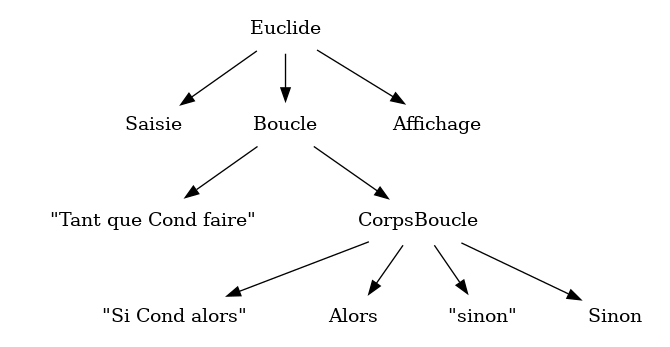

In [28]:
import pygraphviz as pg
from IPython.display import display, Image
d = pg.AGraph("euclideSyntaxique.dot")  
d.layout(prog="dot")    
d.draw("euclideSyntaxique.png")
display(Image('euclideSyntaxique.png'))